### Step 1:

First we load the energy data, which is a list of indicators of [energy supply and renewable electricity production] from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and we put into a DataFrame with the variable name of **Energy**.


Then we Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**).

Finally, we load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) , which ranks countries based on their journal contributions in the aforementioned area.

We join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). We use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 


In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [26]:
x = pd.ExcelFile('Energy Indicators.xls')
energy = x.parse(skiprows=17,skip_footer=(38))
energy = energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
energy['Energy Supply'] = energy['Energy Supply']*1000000
energy['Country'] = energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})
energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")
    
GDP = pd.read_csv('world_bank.csv',skiprows=4)
GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

ScimEn = pd.read_excel(io='scimagojr-3.xlsx')
ScimEn_m = ScimEn[:15]
    
df = pd.merge(ScimEn_m,energy,how='inner',left_on='Country',right_on='Country')
final_df = pd.merge(df,GDP,how='inner',left_on='Country',right_on='Country')
final_df = final_df.set_index('Country')
final_df


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Step 2:
What are the top 15 countries for average GDP over the last 10 years?


In [27]:
Top15=final_df
avgGDP = Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1).rename('avgGDP').sort_values(ascending=False)
avgGDP


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

### Step 3:
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

In [29]:
ans = Top15[Top15['Rank'] == 4]['2015'] - Top15[Top15['Rank'] == 4]['2006']
pd.to_numeric(ans)


Country
United Kingdom    2.467027e+11
dtype: float64

### Step 4:
What is the mean energy supply per capita?

In [31]:
ans = Top15['Energy Supply per Capita'].mean()
ans

157.6

### Step 5:
What country has the maximum % Renewable and what is the percentage?

In [32]:
ans = Top15[Top15['% Renewable'] == max(Top15['% Renewable'])]
(ans.index.tolist()[0],ans['% Renewable'].tolist()[0])


('Brazil', 69.64803)

### Step 6:
What is the maximum value of the ratio of Self-Citations to Total Citations, and what country has the highest ratio?


In [33]:
Top15['Citation Ratio'] = Top15['Self-citations']/Top15['Citations']
ans = Top15[Top15['Citation Ratio'] == max(Top15['Citation Ratio'])]
(ans.index.tolist()[0],ans['Citation Ratio'].tolist()[0])


('China', 0.6893126179389422)

### Step 7:

After estimating the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

In [35]:
Top15['Population'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
Top15['Population'] = Top15['Population'].sort_values(ascending=False)
Top15["Population"].index[1]

'United States'

### Step 9:

What is the correlation between the number of citable documents per capita and the energy supply per capita?

In [36]:
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
ans = Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])
ans

0.7940010435442942

<AxesSubplot:xlabel='Citable docs per Capita', ylabel='Energy Supply per Capita'>

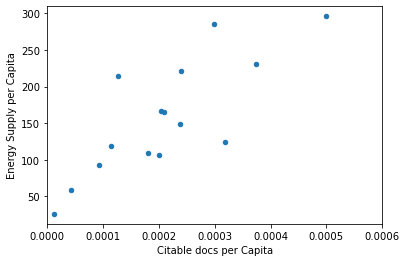

In [38]:
import matplotlib as plt
%matplotlib inline
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

### Step 9:
We create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

In [45]:
Top15['HighRenew'] = [1 if x >= Top15['% Renewable'].median() else 0 for x in Top15['% Renewable']]
Top15['HighRenew']

0     1
1     0
2     0
3     0
4     1
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    0
13    0
14    1
Name: HighRenew, dtype: int64

### Step 10:
We group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

In [55]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)
Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
ans = Top15.set_index('Continent')
ans = ans.groupby(level=0).agg({'PopEst': [np.size,np.sum,np.mean,np.std]})
ans.columns=['size', 'sum', 'mean', 'std']
ans = ans[['size', 'sum', 'mean', 'std']]
ans

,size,sum,mean,std
Continent,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


### Step 11:
We cut % Renewable into 5 bins. We group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

In [62]:
Top15['bins'] = pd.cut(Top15['% Renewable'],5)
Top15.groupby(['Continent','bins']).size()

Continent      bins            
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64

### Step 12:
We convert the Population Estimate series to a string with thousands separator (using commas). We use all significant digits.

In [64]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
map_str = []
for num in Top15['PopEst']:
    map_str.append(locale.format('%.2f',num,grouping=True))
Top15['PopEst_str'] = map_str
Top15['PopEst_str']

0     1,367,645,161.29
1       317,615,384.62
2       127,409,395.97
3        63,870,967.74
4       143,500,000.00
5        35,239,864.86
6        80,369,696.97
7     1,276,730,769.23
8        63,837,349.40
9        49,805,429.86
10       59,908,256.88
11       46,443,396.23
12       77,075,630.25
13       23,316,017.32
14      205,915,254.24
Name: PopEst_str, dtype: object

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


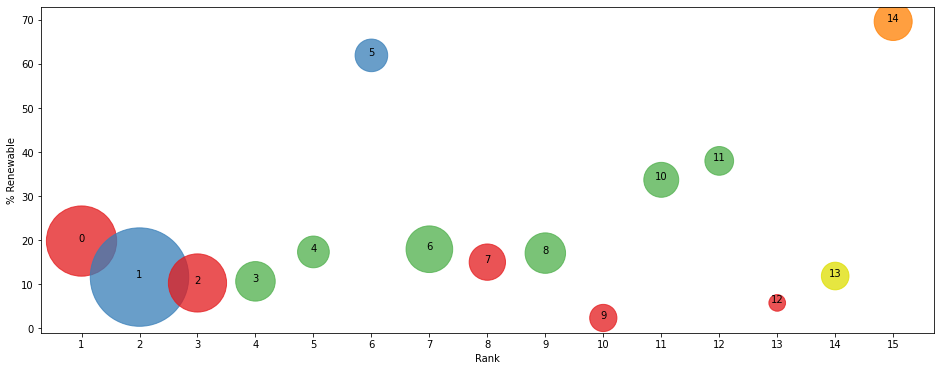

In [65]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
plot_optional()